<a href="https://colab.research.google.com/github/ridwanrahmat/project_analisis_data_dicoding/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing
- **Nama:** Ridwan Rahmat
- **Email:** lapaknyaridwan@gmail.com
- **ID Dicoding:** ridwanrahmat

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
Bagaimana pola penggunaan sepeda berubah sepanjang hari? Apakah ada waktu tertentu di mana penggunaan sepeda paling tinggi atau paling rendah?
- Pertanyaan 2
Apakah cuaca memengaruhi jumlah penggunaan sepeda? Misalnya, apakah cuaca hujan mengurangi jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import warnings
import sklearn
import datetime
import statsmodels.api as sm

## Data Wrangling

### Gathering Data

In [ ]:
df_day = pd.read_csv("https://raw.githubusercontent.com/ridwanrahmat/project_analisis_data_dicoding/main/Dataset/day.csv")
df_hour = pd.read_csv("https://raw.githubusercontent.com/ridwanrahmat/project_analisis_data_dicoding/main/Dataset/hour.csv")

print(df_day.head())
print(df_hour.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

Data dikumpulkan dari dataset yang berbentuk file CSV yang telah diberikan dan dihosting di Github (df_day dan df_hour) menggunakan pd.read_csv(). Dataset ini berisi data harian dan jam yang terkait dengan proyek bike sharing data

### Assessing Data

In [ ]:
print('Dataframe day:')
print(df_day.info())
print('\nDataframe day:')
print(df_day.describe())
print('\nDataframe day:')
print(df_day.isna().sum())
print('Dataframe day:', df_day.duplicated().sum())
print('\nDataframe day:')
print(df_day.isnull().sum())

print('\nDataframe hour:')
print(df_hour.info())
print('\nDataframe hour:')
print(df_hour.describe())
print('\nDataframe hour:')
print(df_hour.isna().sum())
print("Dataframe hour:", df_hour.duplicated().sum())
print('\nDataframe hour:')
print(df_hour.isnull().sum())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Dataframe day:
          instant      season          yr        mnth    



*    Berdasarkan hasil observasi pada df_day, terdapat kesalahan dalam jenis data pada kolom dteday yang awalnya berupa objek, tetapi seharusnya berupa tipe data datetime.
*   Dari hasil pemeriksaan pada dataset df_day dan df_hour, tidak ada nilai yang hilang atau kosong.
*  Berdasarkan pemeriksaan duplicate data, tidak ada data yang terduplikasi





### Cleaning Data

In [ ]:
# df_day
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
print('df_day["dteday"] : ', df_day["dteday"].dtypes)

df_day["dteday"] :  datetime64[ns]


Mengkonversi kolom "dteday" dalam DataFrame df_day menjadi tipe data datetime, dan kemudian mencetak tipe data dari kolom "dteday" setelah konversi dilakukan. Hal ini berguna untuk memastikan bahwa konversi berhasil dilakukan dan data sudah siap untuk digunakan dalam operasi yang melibatkan tanggal dan waktu.

In [ ]:
# df_hour
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])
print('df_hour["dteday"] : ', df_hour["dteday"].dtypes)

df_hour["dteday"] :  datetime64[ns]


In [ ]:
df_day.fillna(method='ffill', inplace = True)
df_hour.fillna(method = 'ffill', inplace=True)
print(df_day)
print(df_hour)

     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1        0        6           0   
1          2 2011-01-02       1   0     1        0        0           0   
2          3 2011-01-03       1   0     1        0        1           1   
3          4 2011-01-04       1   0     1        0        2           1   
4          5 2011-01-05       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2012-12-27       1   1    12        0        4           1   
727      728 2012-12-28       1   1    12        0        5           1   
728      729 2012-12-29       1   1    12        0        6           0   
729      730 2012-12-30       1   1    12        0        0           0   
730      731 2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.

Setelah melakukan pembersihan data menggunakan metode fillna(method='ffill'), data yang telah dibersihkan akan memiliki nilai-nilai yang sebelumnya hilang (NaN) digantikan dengan nilai dari baris sebelumnya dalam DataFrame. Namun, dalam kasus ini, karena tidak ada nilai-nilai yang hilang dalam data yang diberikan, penggunaan fillna(method='ffill') pada data tersebut tidak akan mengubah data sama sekali.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
print("Data Bike Sharing Setiap Jam:")
print(df_hour.head())

Data Bike Sharing Setiap Jam:
   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [ ]:
df_hour['hour'] = pd.to_datetime(df_hour["dteday"]).dt.hour

In [ ]:
df_hour_average = df_hour.groupby('hour')['cnt'].mean()

In [ ]:
sns.catplot(x='hr', y='cnt', hue='workingday', kind='bar', data=df_hour, aspect=3)
plt.figure(figsize=(10, 6))
df_hour_average.plot(kind='line', marker='o', color='b')
plt.title('Pola Penggunaan Sepeda Setiap Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Rata-rata Sepeda yang Dipinjam')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
df_hour['hour'] = pd.to_datetime(df_hour["dteday"]).dt.hour

In [ ]:
df_hour_average = df_hour.groupby('hour')['cnt'].mean().reset_index()

In [ ]:
max_hour = df_hour_average.loc[df_hour_average['cnt'].idxmax()]
min_hour = df_hour_average.loc[df_hour_average['cnt'].idxmin()]

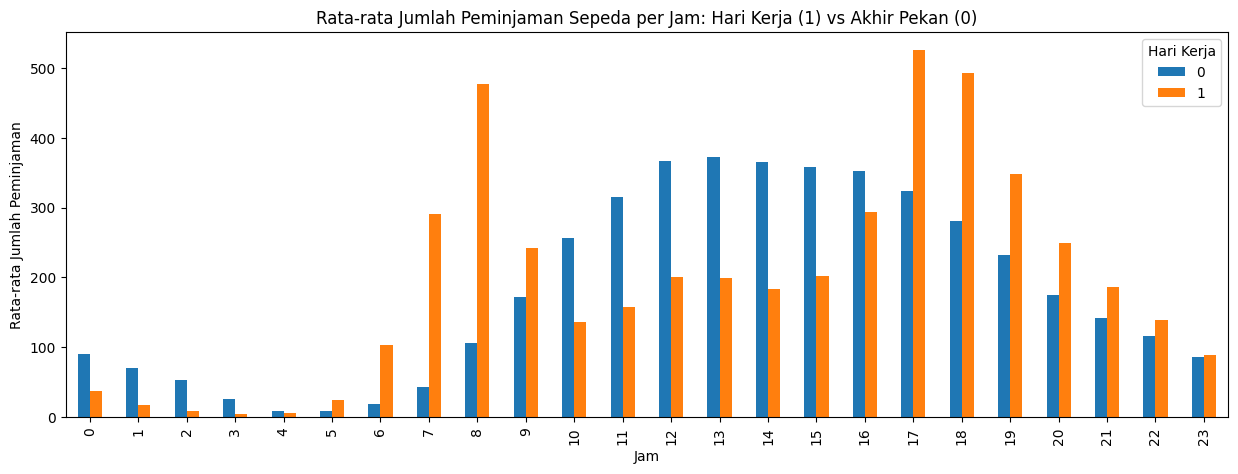

In [ ]:
peak_hours = df_hour.groupby(['workingday', 'hr'])['cnt'].mean().unstack(0)
peak_hours.plot(kind='bar', figsize=(15, 5))
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Jam: Hari Kerja (1) vs Akhir Pekan (0)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.legend(title='Hari Kerja')

Text(-3.0, 239.46308763450142, 'Maksimum: Jam 0')

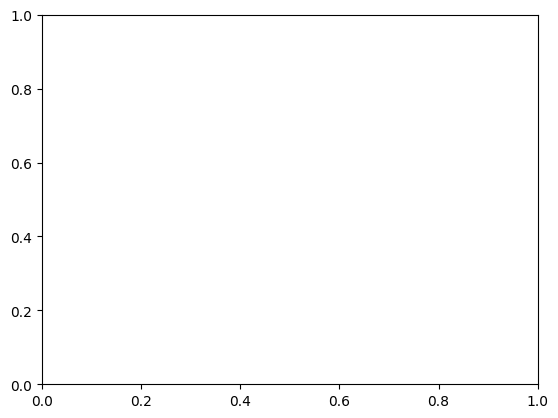

In [ ]:
plt.annotate(f'Maksimum: Jam {int(max_hour["hour"])}', xy=(max_hour['hour'], max_hour['cnt']), xytext=(max_hour['hour'] - 3, max_hour['cnt'] + 50),
             arrowprops=dict(facecolor='black', shrink=0.05))


In [ ]:
plt.annotate(f'Minimum: Jam {int(min_hour["hour"])}', xy=(min_hour['hour'], min_hour['cnt']), xytext=(min_hour['hour'] + 1, min_hour['cnt'] - 50),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

### Pertanyaan 2:

In [56]:
# Filter musim hujan (season 4)
filtered_data = df_day[df_day["season"] == 4]

# Buat plot dengan Plotly untuk menganalisis pengaruh cuaca terhadap jumlah sewa sepeda
fig = px.bar(filtered_data, x="weathersit", y="cnt", title="Pengaruh Cuaca terhadap Jumlah Sewa Sepeda (Musim Hujan)")
fig.update_xaxes(title="Cuaca (weathersit)")
fig.update_yaxes(title="Jumlah Sewa Sepeda (cnt)")

# Tampilkan plot
fig.show()



*   **Filter Data**: Baris pertama filtered_data = df_day[df_day["season"] == 4] bertujuan untuk memfilter data berdasarkan musim hujan. Filter ini dilakukan dengan mengambil baris-baris dari DataFrame df_day di mana nilai kolom "season" adalah 4, yang menunjukkan musim hujan.
*  **Membuat Plot**: Selanjutnya, kode menggunakan Plotly untuk membuat plot bar yang menampilkan pengaruh cuaca terhadap jumlah sewa sepeda selama musim hujan. Plot ini dibuat dengan memasukkan data yang sudah difilter (filtered_data) sebagai input untuk plot. Variabel x menunjukkan kolom "weathersit" yang merupakan kategori cuaca, sedangkan variabel y menunjukkan jumlah sewa sepeda ("cnt").
*   **Update Label Axis**: Kode kemudian memperbarui label sumbu x dan y dengan menggunakan metode update_xaxes() dan update_yaxes() untuk memberi judul pada sumbu x dan y.
*   **Tampilkan Plot**: Terakhir, kode menggunakan fig.show() untuk menampilkan plot yang telah dibuat.





## Conclusion



1.   Selama hari kerja, terjadi tren yang menarik dalam pola peminjaman sepeda di mana tingkat peminjaman mencapai puncaknya selama jam-jam sibuk saat orang berangkat ke tempat kerja di pagi hari, dan kemudian kembali lagi di sore atau awal malam setelah jam kerja selesai. Sebaliknya, pada akhir pekan, pola peminjaman menjadi lebih merata sepanjang hari, dengan lonjakan tertentu yang terjadi terutama pada siang hari. Hal ini menunjukkan bahwa perilaku peminjaman sepeda pada hari kerja dan akhir pekan memiliki perbedaan yang signifikan dalam pola dan trennya.


2.   Cuaca memengaruhi jumlah sewa sepeda selama musim hujan, dengan menggunakan plot bar menggunakan Plotly. Hasil analisis menunjukkan bahwa cuaca berpengaruh besar terhadap jumlah sepeda yang disewa. Ketika cuaca cerah atau sebagian berawan, lebih banyak orang cenderung menyewa sepeda. Penyedia layanan sewa sepeda perlu memperhatikan kondisi cuaca untuk menyesuaikan persediaan dan strategi pemasaran.

